# ISLR Chapter 6 - Linear Models and Regularization Methods

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV


from sklearn.preprocessing import scale
from sklearn.model_selection import KFold as KF
from sklearn.decomposition import PCA

from sklearn.linear_model import Lasso, LassoCV

import statsmodels.api as sm


## Exercise 8

### a

In [3]:
X = np.random.normal(size=100)
epsilon = np.random.normal(size=100)

In [4]:
len(X), len(epsilon)

(100, 100)

### b

In [5]:
BETA0 = 82
BETA1 = -5.32
BETA2 = 28.62
BETA3 = 89.0
Y = BETA0 + (BETA1*X) + (BETA2*pow(X, 2)) + (BETA3*pow(X, 3)) + epsilon
Y

array([ 187.08141333,   78.49390895,   69.41944757,   83.93925268,
        227.49835932,   81.59396752,   80.93924261,  104.21416963,
       1085.3818511 ,   57.49198441,   82.69373394,   77.76950666,
         83.39532904,   82.24824063,  621.27196118,  388.67873214,
         75.8704883 ,   83.71596674,   42.33612589,  348.73391231,
         84.68960682,   82.45488317,   55.36918063,   78.64381105,
        149.65184508,   93.10305651,   83.27790871,   97.74531633,
        121.84270077,  108.55877953,   64.07305615, -568.61708481,
          3.65074722,   33.11995057,   85.05793478,   81.87198304,
        250.27172101,   82.62566828,   81.91319282,  541.99618224,
         84.75532667,   82.80877071,   69.20690635,   82.78788355,
       1512.75820692,   77.06594788,   89.59041319,  144.18179252,
        176.49491557,   90.21653968,  -48.90351283,   83.42004095,
        137.39993324,   85.08760538,   84.0493773 , -143.0000734 ,
        135.06883195,  226.04891359,   61.34200948,   49.01426

In [6]:
df = pd.DataFrame([X, Y]).T
df.columns = ['X', 'Y']
df.head()

,X,Y
0,0.978856,187.081413
1,-0.560706,78.493909
2,-0.703848,69.419448
3,-0.163484,83.939253
4,1.091981,227.498359


### c

In [7]:
dfX = pd.DataFrame([X, pow(X, 2), pow(X, 3), pow(X, 4), pow(X, 5), pow(X, 6), pow(X, 7), pow(X, 8), pow(X, 9), pow(X, 10)]).T
dfX.columns = ['X', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9', 'X^10']
dfX.head()

,X,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10
0,0.978856,0.958160,0.937901,0.918070,0.898659,0.879658,0.861059,8.428529e-01,8.250319e-01,8.075878e-01
1,-0.560706,0.314391,-0.176281,0.098842,-0.055421,0.031075,-0.017424,9.769718e-03,-5.477940e-03,3.071514e-03
2,-0.703848,0.495402,-0.348687,0.245423,-0.172740,0.121583,-0.085576,6.023242e-02,-4.239446e-02,2.983925e-02
3,-0.163484,0.026727,-0.004369,0.000714,-0.000117,0.000019,-0.000003,5.102663e-07,-8.342024e-08,1.363785e-08
4,1.091981,1.192422,1.302101,1.421869,1.552654,1.695468,1.851418,2.021712e+00,2.207671e+00,2.410734e+00


### d

In [8]:
dfY = pd.DataFrame(df['Y'])
dfY.head()

,Y
0,187.081413
1,78.493909
2,69.419448
3,83.939253
4,227.498359


In [9]:
lm = LinearRegression()
efs = EFS(lm, min_features=1, max_features=10, scoring='r2', cv=10).fit(dfX, dfY)

Features: 1023/1023

### e

### f

In [10]:
# SCORE = pd.DataFrame()
# for k in efs.get_metric_dict():
#     score = efs.get_metric_dict()[k]['std_err']
#     SCORE = SCORE.append([score])

# SCORE.columns = ['std err']
# SCORE.reset_index(drop=True, inplace=True)

# plt.xkcd()
# plt.figure(figsize=(25, 10))
# plt.plot(SCORE)

In [11]:
# minSCORE = SCORE.loc[SCORE['std err'] == min(SCORE['std err'])]
# minSCORE

## Exercise 9

* [College.csv](https://www.statlearning.com/s/College.csv)

In [12]:
# !wget --no-check-certificate 'https://www.statlearning.com/s/College.csv' -O College.csv
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS

In [13]:
df = pd.read_csv("College.csv", index_col = 'Unnamed: 0')

In [14]:
df.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [15]:
dummy = pd.get_dummies(df.Private, prefix='Private')

In [16]:
df.Private = dummy.Private_Yes

### a

In [17]:
# set random seed for reproducible results
np.random.seed(0)

# construct randomly chosen train set roughly 50/50 split
train = np.random.choice([True,False], size=len(df))
df_train = df[train]
df_test = df[~train]

### b

In [18]:
# Fit a least squares model to predict the number of recieved apps as function of all the other features
y_train = df_train['Apps']
features = list(df)
features.remove('Apps')
X_train = df_train[features]

# Fit model, report params
lm = sm.OLS(y_train,sm.add_constant(X_train)).fit()
lm.params

# compute MSE
y_predicted = lm.predict(sm.add_constant(df_test[features]))

LS_MSE = np.mean((df_test.Apps.values-y_predicted)**2)
print("The Least Squares Test MSE = ", LS_MSE)

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The Least Squares Test MSE =  1848054.149777522


### c

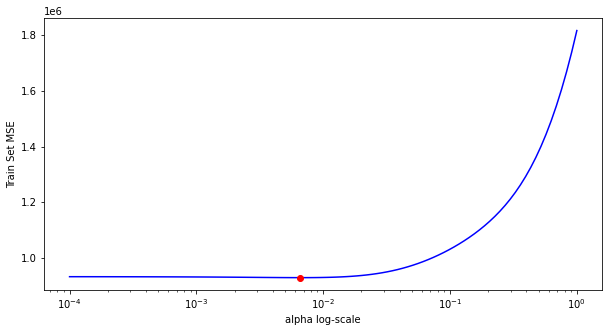

In [19]:
# Fit ridge regression over a range of possible alphas
alphas = np.logspace(-4, 0, 100)
# Build estimator
ridge_cv = RidgeCV(alphas = alphas, normalize=True, store_cv_values=True)
# Fit model
results = ridge_cv.fit(X_train.values, y_train.values)

# the results contains a np array [num_samples,num_alphas] a form of LOOCV was performed so 
# the mean(axis=0) is the average MSE for a given alpha
cvs = np.mean(results.cv_values_, axis=0)
# get the minimum error rate and get the optimum alpha
min_cvs = np.min(cvs)
min_alpha = results.alpha_

# Plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(alphas,np.mean(results.cv_values_,axis=0), color='b')
ax.plot(min_alpha, min_cvs, color='r', marker='o',)
ax.set_xscale('log')
ax.set_xlabel('alpha log-scale');
ax.set_ylabel('Train Set MSE');


In [20]:
# Get the ridge models predictions on the test set
ridge_predicted = results.predict(df_test[features].values)

# Get the MSE of the Ridges predictions
Ridge_MSE = np.mean((df_test.Apps.values-ridge_predicted)**2)
print("The Ridge Model Test MSE = ", Ridge_MSE, '\n')

print(pd.Series(data = np.hstack([results.intercept_,results.coef_]), index=['Intercept'] + features))

The Ridge Model Test MSE =  1953825.6534590614 

Intercept     -1062.694072
Private        -684.649474
Accept            1.058455
Enroll            0.334379
Top10perc        38.852495
Top25perc        -9.697783
F.Undergrad       0.005961
P.Undergrad       0.055038
Outstate         -0.024309
Room.Board        0.177457
Books             0.281210
Personal         -0.029562
PhD              -4.390837
Terminal         -4.765855
S.F.Ratio        19.370603
perc.alumni      -5.691326
Expend            0.062184
Grad.Rate        11.416957
dtype: float64


### d

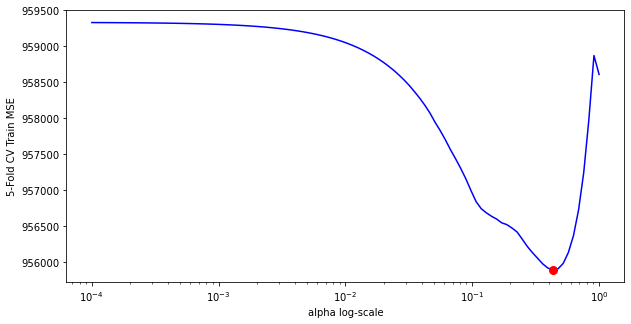

In [21]:
# Use LassoCV to perform 5-fold cross validation to determine optimal alpha
lasso_cv = LassoCV(alphas = np.logspace(-4,0,100), normalize=True, cv=5, max_iter=100000)
lasso_cv.fit(X_train.values, y_train.values)

# The mse estimates are the mean aross folds (cols)
mses = np.mean(lasso_cv.mse_path_, axis=1)

# Plot CV error vs alpha
fig, ax = plt.subplots(figsize=(10,5));
ax.plot(lasso_cv.alphas_,mses, color='b');
ax.plot(lasso_cv.alpha_, np.min(mses), marker='o', color='r', markersize=8);
ax.set_xlabel('alpha log-scale');
ax.set_xscale('log')
ax.set_ylabel('5-Fold CV Train MSE');

In [22]:
# Get the lasso model predictions on the test set
lasso_predicted = lasso_cv.predict(df_test[features].values)

# Get the MSE of the lasso predictions
Lasso_MSE = np.mean((df_test.Apps.values-lasso_predicted)**2)
print("The Lasso Model Test MSE = ", Lasso_MSE,'\n')
print('Alpha = ', lasso_cv.alpha_,'\n')
print(pd.Series(data = np.hstack([lasso_cv.intercept_,lasso_cv.coef_]), index=['Intercept'] + features))

The Lasso Model Test MSE =  1860777.358657831 

Alpha =  0.43287612810830617 

Intercept     -1006.260175
Private        -671.472978
Accept            1.123507
Enroll            0.195411
Top10perc        35.843090
Top25perc        -6.979835
F.Undergrad       0.002698
P.Undergrad       0.048355
Outstate         -0.021418
Room.Board        0.158239
Books             0.223854
Personal         -0.008984
PhD              -3.480322
Terminal         -4.468332
S.F.Ratio        16.709474
perc.alumni      -4.605209
Expend            0.058739
Grad.Rate         9.534166
dtype: float64


### g